In [5]:
import pandas, matplotlib.pyplot as plt, numpy

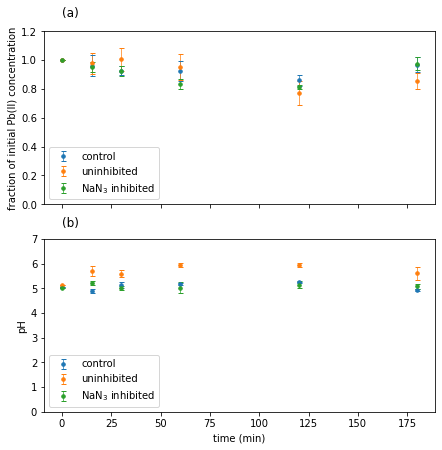

<Figure size 432x288 with 0 Axes>

In [6]:
df = pandas.read_excel('data/klebsiella_living_v_dead.xlsx')
df['t_min'] = ""
df['C'] = df['C_AA']*df['C_f']
df['Ct/C0'] = ""

bottles = list(range(1,10,1))
formalin_bottles = list(range(16,19,1))
all_bottles = bottles + formalin_bottles
ts = range(0,6,1)
t_mins = {0:0,
          1:15,
          2:30,
          3:60,
          4:120,
          5:180}

for bottle in all_bottles:
    df_bottles = df.loc[df['Bottle number'] == bottle]
    for t in ts:
        df_t0 = df_bottles.loc[df['t'] ==  0]
        df_t = df_bottles.loc[df['t'] ==  t]
        index = int(df_t.index.values)
        df.at[index, 't_min'] = t_mins[t]
        df.at[index, 'Ct/C0'] =  float(df_t['C'])/float(df_t0['C'])

df['Ct/C0'] = pandas.to_numeric(df['Ct/C0'])
df['pH'] = pandas.to_numeric(df['pH'])
        
mortalities = ['c', 'a', 'd']#, 'f']
mort_label_list = ['control', 'uninhibited', 'NaN$_3$ inhibited', 'formalin inhibited']
mort_labels = dict(zip(mortalities,
                       mort_label_list))


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), sharex=True)
ax_conc, ax_pH = axes

def plot_to_axes(df_m_grp, col_name, axis):
    df_m_mean = df_m_grp.mean()
    df_m_std = df_m_grp.std()
    x = df_m_mean.index
    y_conc = df_m_mean[col_name]
    yerr_conc = df_m_std[col_name]/numpy.sqrt(3)
    axis.errorbar(x=x, 
                 y=y_conc,
                 yerr=yerr_conc,
                 fmt='.',
                 capsize=2.5,  
                 elinewidth=0.7, 
                 markersize=7, 
                 linewidth=4,
                 label=mort_labels[m])

for m in mortalities:
    df_m = df.loc[df['mortality'] == m]
    df_m_grp = df_m.groupby('t_min')[['Ct/C0', 'pH']]
    plot_to_axes(df_m_grp, 'Ct/C0', ax_conc)
    plot_to_axes(df_m_grp, 'pH', ax_pH)

ax_conc.legend()    
ax_pH.legend()
ax_conc.set_ylim(0,1.2)
ax_pH.set_ylim(0,7)
ax_conc.text(0, 1.3, '(a)', fontsize=12)
ax_pH.text(0, 7.5, '(b)', fontsize=12)

ax_conc.set_ylabel('fraction of initial Pb(II) concentration')
ax_pH.set_ylabel('pH')
plt.xlabel('time (min)')
plt.show()
plt.draw()


In [7]:
fig.savefig('pics/klebs_living_vs_dead.png', bbox_inches='tight', dpi=600)

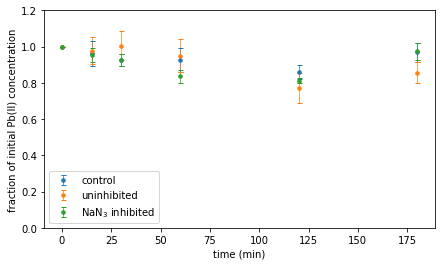

<Figure size 432x288 with 0 Axes>

In [8]:
df = pandas.read_excel('data/klebsiella_living_v_dead.xlsx')
df['t_min'] = ""
df['C'] = df['C_AA']*df['C_f']
df['Ct/C0'] = ""

bottles = list(range(1,10,1))
formalin_bottles = list(range(16,19,1))
all_bottles = bottles + formalin_bottles
ts = range(0,6,1)
t_mins = {0:0,
          1:15,
          2:30,
          3:60,
          4:120,
          5:180}

for bottle in all_bottles:
    df_bottles = df.loc[df['Bottle number'] == bottle]
    for t in ts:
        df_t0 = df_bottles.loc[df['t'] ==  0]
        df_t = df_bottles.loc[df['t'] ==  t]
        index = int(df_t.index.values)
        df.at[index, 't_min'] = t_mins[t]
        df.at[index, 'Ct/C0'] =  float(df_t['C'])/float(df_t0['C'])

df['Ct/C0'] = pandas.to_numeric(df['Ct/C0'])
df['pH'] = pandas.to_numeric(df['pH'])
        
mortalities = ['c', 'a', 'd']#, 'f']
mort_label_list = ['control', 'uninhibited', 'NaN$_3$ inhibited', 'formalin inhibited']
mort_labels = dict(zip(mortalities,
                       mort_label_list))


fig2, ax_conc = plt.subplots(nrows=1, ncols=1, figsize=(7, 4), sharex=True)

def plot_to_axes(df_m_grp, col_name, axis):
    df_m_mean = df_m_grp.mean()
    df_m_std = df_m_grp.std()
    x = df_m_mean.index
    y_conc = df_m_mean[col_name]
    yerr_conc = df_m_std[col_name]/numpy.sqrt(3)
    axis.errorbar(x=x, 
                 y=y_conc,
                 yerr=yerr_conc,
                 fmt='.',
                 capsize=2.5,  
                 elinewidth=0.7, 
                 markersize=7, 
                 linewidth=4,
                 label=mort_labels[m])

for m in mortalities:
    df_m = df.loc[df['mortality'] == m]
    df_m_grp = df_m.groupby('t_min')[['Ct/C0', 'pH']]
    plot_to_axes(df_m_grp, 'Ct/C0', ax_conc)

ax_conc.legend()    
ax_conc.set_ylim(0,1.2)

ax_conc.set_ylabel('fraction of initial Pb(II) concentration')
plt.xlabel('time (min)')
plt.show()
plt.draw()


In [9]:
fig2.savefig('pics/klebs_living_vs_dead_no_pH.png', bbox_inches='tight', dpi=600)

In [ ]:
df = pandas.read_excel('data/klebsiella_living_v_dead.xlsx')
df['t_min'] = ""
df['C'] = df['C_AA']*df['C_f']
df['Ct/C0'] = ""

bottles = list(range(1,10,1))
formalin_bottles = list(range(16,19,1))
all_bottles = bottles + formalin_bottles
ts = range(0,6,1)
t_mins = {0:0,
          1:15,
          2:30,
          3:60,
          4:120,
          5:180}

for bottle in all_bottles:
    df_bottles = df.loc[df['Bottle number'] == bottle]
    for t in ts:
        df_t0 = df_bottles.loc[df['t'] ==  0]
        df_t = df_bottles.loc[df['t'] ==  t]
        index = int(df_t.index.values)
        df.at[index, 't_min'] = t_mins[t]
        df.at[index, 'Ct/C0'] =  float(df_t['C'])/float(df_t0['C'])

df['Ct/C0'] = pandas.to_numeric(df['Ct/C0'])
df['pH'] = pandas.to_numeric(df['pH'])
        
mortalities = ['c', 'a', 'd']#, 'f']
mort_label_list = ['control', 'uninhibited', 'NaN$_3$ inhibited', 'formalin inhibited']
mort_labels = dict(zip(mortalities,
                       mort_label_list))


fig3, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), sharex=True)
ax_conc, ax_zeta = axes

def plot_to_axes(df_m_grp, col_name, axis):
    df_m_mean = df_m_grp.mean()
    df_m_std = df_m_grp.std()
    x = df_m_mean.index
    y_conc = df_m_mean[col_name]
    yerr_conc = df_m_std[col_name]/numpy.sqrt(3)
    axis.errorbar(x=x, 
                 y=y_conc,
                 yerr=yerr_conc,
                 fmt='.',
                 capsize=2.5,  
                 elinewidth=0.7, 
                 markersize=7, 
                 linewidth=4,
                 label=mort_labels[m])

for m in mortalities:
    df_m = df.loc[df['mortality'] == m]
    df_m_grp = df_m.groupby('t_min')[['Ct/C0', 'pH']]
    plot_to_axes(df_m_grp, 'Ct/C0', ax_conc)
    plot_to_axes(df_m_grp, 'pH', ax_pH)

ax_conc.legend()    
ax_pH.legend()
ax_conc.set_ylim(0,1.2)
ax_pH.set_ylim(0,7)
ax_conc.text(0, 1.3, '(a)', fontsize=12)
ax_pH.text(0, 7.5, '(b)', fontsize=12)

ax_conc.set_ylabel('fraction of initial Pb(II) concentration')
ax_pH.set_ylabel('pH')
plt.xlabel('time (min)')
plt.show()
plt.draw()


In [10]:
df_zetapotential = pandas.read_table('C:/Users/brand/Documents/University/Beyond_MEng/Bacteria/Regression/Zeta/exported.txt')

In [11]:
samples = df_zetapotential['Sample Name']
zeta = df_zetapotential['Zeta Potential (mV)']

samples = samples.str.split('(\d+)([A-Za-z]+)',expand=True)
samples.drop(0, axis=1, inplace=True)
samples.columns = ['pH_nominal', 'mortality', 'run']
samples['pH'] = ""

actual_pHs = {'2':1.999,
              '4':4.168,
              '6':5.956,
              '8':7.520,
              '10':9.943,
              '12':11.990}

for pH_string in actual_pHs:
    samples.loc[samples['pH_nominal'] == pH_string, 'pH'] = actual_pHs[pH_string]
    
df_sz = pandas.concat([samples, zeta], axis=1)
df_sz['pH'] = pandas.to_numeric(df_sz['pH'])

duds = df_sz.loc[df_sz['run'].str.contains("_") == True]
duds_indices = duds.index.values

df_sz = df_sz.drop(duds_indices)

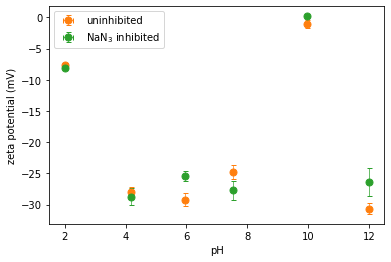

<Figure size 432x288 with 0 Axes>

In [12]:
mortalities = ['a', 'd']
labels = ['uninhibited', 'NaN$_3$ inhibited']
colors = ['tab:orange', 'tab:green']


labels_by_mortality = dict(zip(mortalities, labels))
colors_by_mortality = dict(zip(mortalities, colors))

fig = plt.figure()

for mort in mortalities:
    df = df_sz.loc[df_sz['mortality'] == mort]
    df_grp = df.groupby('pH_nominal')[['pH', 'Zeta Potential (mV)']]
    
    y = df_grp.mean()['Zeta Potential (mV)']
    yerr = df_grp.std()['Zeta Potential (mV)']/numpy.sqrt(3)
    x = df_grp.mean()['pH']
    xerr = df_grp.std()['pH']/numpy.sqrt(3)
        
    plt.errorbar(x=x,
                 xerr=xerr,
                 y=y,
                 yerr=yerr,
                 fmt='o',
                 capsize=2.5,  
                 elinewidth=0.7, 
                 markersize=7, 
                 linewidth=4,
                 label=labels_by_mortality[mort],
                 color=colors_by_mortality[mort]) 
    
plt.xlabel('pH')
plt.ylabel('zeta potential (mV)')
plt.legend()
plt.show()
plt.draw()